<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [3]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import matplotlib

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

Для возпроизводимости результатов

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [4]:
df_train.to_csv("df_train_hse.csv")
df_test.to_csv("df_test_hse.csv")

### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [5]:
df = pd.concat([df_train, df_test])
print(df.loc[:, df.isna().sum() > 0].isna().sum())
print(df.nunique())
print(df.duplicated().sum())

mileage      221
engine       221
max_power    215
torque       222
seats        221
dtype: int64
name             2045
year               29
selling_price     674
km_driven         911
fuel                4
seller_type         3
transmission        2
owner               5
mileage           392
engine            121
max_power         322
torque            439
seats               9
dtype: int64
1170


In [6]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")

In [18]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
# Цена продажи растет со временем
# Большее кол-во проданных автомобилей инеют от 5 до 8 сидений и пробег меньше 200_000 км
# поля max_power, mileage, torque, engine имеют тип object но в них находятся числовые значения

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [20]:
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [21]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [22]:
df_train.describe(include="O")

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [23]:
df_test.describe(include="O")

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

In [24]:
df_train.loc[:, df_train.dtypes != object].mean()

year               2013.818403
selling_price    639515.197171
km_driven         69584.615517
seats                 5.419008
dtype: float64

In [25]:
df_train.loc[:, df_train.dtypes != object].mean() - df_test.loc[:, df_test.dtypes != object].mean()

year                 0.137403
selling_price    21614.155171
km_driven        -1808.725483
seats                0.008203
dtype: float64

In [26]:
df_train.loc[:, df_train.dtypes != object].median() - df_test.loc[:, df_test.dtypes != object].median()

year                 1.0
selling_price    15001.0
km_driven        -1500.0
seats                0.0
dtype: float64

In [27]:
100 - df_test.loc[:, df_test.dtypes != object].mean() / df_train.loc[:, df_train.dtypes != object].mean() * 100

year             0.006823
selling_price    3.379772
km_driven       -2.599318
seats            0.151376
dtype: float64

In [28]:
100 - df_test.loc[:, df_test.dtypes != object].median() / df_train.loc[:, df_train.dtypes != object].median() * 100

year             0.049628
selling_price    3.333556
km_driven       -2.500000
seats            0.000000
dtype: float64

In [29]:
# mean и median selling_price и km_driven отличаются более чем на 0.5%
# в df_test находятся автомобили в среднем с большим пробегом и более низкой ценой

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [8]:
df_train.duplicated(subset=df_train.drop("selling_price", axis=1).columns).sum()

np.int64(1159)

In [7]:
df_train = df_train.drop_duplicates(subset=df_train.drop("selling_price", axis=1).columns)

In [8]:
df_train = df_train.reset_index(drop=True)

In [9]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [12]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [10]:
df_train["mileage"] = df_train["mileage"].str.extract(r'(\d+\.\d+|\d+)')
df_train["engine"] = df_train["engine"].str.extract(r'(\d+\.\d+|\d+)')
df_train["max_power"] = df_train["max_power"].str.extract(r'(\d+\.\d+|\d+)')
df_train["torque"] = df_train["torque"].str.extract(r'(\d+,*\d+-*\d+,*\d+)')

df_test["mileage"] = df_test["mileage"].str.extract(r'(\d+\.\d+|\d+)')
df_test["engine"] = df_test["engine"].str.extract(r'(\d+\.\d+|\d+)')
df_test["max_power"] = df_test["max_power"].str.extract(r'(\d+\.\d+|\d+)')
df_test["torque"] = df_test["torque"].str.extract(r'(\d+,*\d+-*\d+,*\d+)')

In [11]:
df_train[["mileage", "engine", "max_power"]] = df_train[["mileage", "engine", "max_power"]].astype(float)

df_test[["mileage", "engine", "max_power"]] = df_test[["mileage", "engine", "max_power"]].astype(float)

In [12]:
def torque(str_):
    if "-" in str_:
        return str_.replace(",", "").split("-")
    else:
        return [str_.replace(",", ""), str_.replace(",", "")]

In [13]:
df_train["torque_"] = None 
df_train["max_torque_rpm"] = None

df_test["torque_"] = None 
df_test["max_torque_rpm"] = None

In [14]:
df_train.loc[df_train["torque"].isna() == False, ["torque_", "max_torque_rpm"]] = list(df_train.loc[df_train["torque"].isna() == False, "torque"].apply(lambda x: torque(x)))

df_test.loc[df_test["torque"].isna() == False, ["torque_", "max_torque_rpm"]] = list(df_test.loc[df_test["torque"].isna() == False, "torque"].apply(lambda x: torque(x)))

In [15]:
df_train[["torque_", "max_torque_rpm"]] = df_train[["torque_", "max_torque_rpm"]].astype(float)

df_test[["torque_", "max_torque_rpm"]] = df_test[["torque_", "max_torque_rpm"]].astype(float)

In [16]:
df_train = df_train.drop("torque", axis=1)

df_test = df_test.drop("torque", axis=1)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [42]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5654.000000  5654.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.432842  1435.418111   
std       4.095622   5.354320e+05  6.007114e+04     4.051002   492.453262   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.800000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.320000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       seats       torque_  max_torque_rpm  
count  5656.000000  5654.00000   5650.000000     5650.000000  
mean     88.103070     5.44075   2681.437699     3046.266903  
std      32.131943     0.99527   1128.209290      926.248005  
min       0.000000     2.00000    175.000000     1400.000000  
25%      68.000000     5.00000   1750.000000     2250.000000  
50%      81.860000     5.00000   2000.000000     3000.000000  
75%     100.000000     5.00000   4000.000000     4000.000000  
max     400.000000    14.00000  21800.000000    21800.000000

In [43]:
df_test.describe()

year  selling_price      km_driven     mileage       engine  \
count  1000.000000   1.000000e+03    1000.000000  981.000000   981.000000   
mean   2013.681000   6.179010e+05   71393.341000   19.338206  1458.882773   
std       4.012149   7.585539e+05   48486.218662    3.989872   526.228560   
min    1995.000000   3.100000e+04    1303.000000    0.000000   624.000000   
25%    2011.000000   2.500000e+05   37000.000000   16.500000  1197.000000   
50%    2014.000000   4.349990e+05   61500.000000   19.330000  1248.000000   
75%    2017.000000   6.700000e+05  100000.000000   22.320000  1582.000000   
max    2020.000000   6.000000e+06  375000.000000   32.260000  3604.000000   

        max_power       seats      torque_  max_torque_rpm  
count  981.000000  981.000000   977.000000      977.000000  
mean    91.015627    5.410805  2713.926305     3100.589560  
std     35.207383    0.919985  1120.575304      887.290911  
min     34.200000    4.000000  1000.000000     1500.000000  
25%     69.000000    5.000000  1750.000000     2500.000000  
50%     83.100000    5.000000  2000.000000     3000.000000  
75%    102.000000    5.000000  4000.000000     4000.000000  
max    280.000000    9.000000  5000.000000     5200.000000

In [17]:
df_train[["mileage", "engine", "max_power", "torque_", "max_torque_rpm", "seats"]] = df_train[["mileage", "engine", "max_power", "torque_", "max_torque_rpm", "seats"]].apply(lambda x: x.fillna(x.median()))

df_test[["mileage", "engine", "max_power", "torque_", "max_torque_rpm", "seats"]] = df_test[["mileage", "engine", "max_power", "torque_", "max_torque_rpm", "seats"]].apply(lambda x: x.fillna(x.median()))

In [45]:
# в данных присутствуют выбросы поэтому mean смещено
# По тестовым свою, по тренировочным — свою

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [18]:
df_train[["engine", "seats"]] = df_train[["engine", "seats"]].astype(int)

df_test[["engine", "seats"]] = df_test[["engine", "seats"]].astype(int)

In [47]:
# seats имеет конечное кол-во значений

`Your answer here`

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [48]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats       torque_  max_torque_rpm  
count  5840.000000  5840.000000   5840.000000     5840.000000  
mean     87.906371     5.426712   2659.267637     3044.761644  
std      31.640418     0.982344   1116.268875      911.090388  
min       0.000000     2.000000    175.000000     1400.000000  
25%      68.000000     5.000000   1750.000000     2250.000000  
50%      81.860000     5.000000   2000.000000     3000.000000  
75%      99.000000     5.000000   3750.000000     4000.000000  
max     400.000000    14.000000  21800.000000    21800.000000

In [49]:
df_test.describe()

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.338050  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.951748   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.550000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.330000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power        seats      torque_  max_torque_rpm  
count  1000.000000  1000.000000  1000.000000      1000.00000  
mean     90.865230     5.403000  2697.506000      3098.27600  
std      34.887729     0.912921  1112.764117       877.14712  
min      34.200000     4.000000  1000.000000      1500.00000  
25%      69.000000     5.000000  1750.000000      2500.00000  
50%      83.100000     5.000000  2000.000000      3000.00000  
75%     102.000000     5.000000  4000.000000      4000.00000  
max     280.000000     9.000000  5000.000000      5200.00000

In [50]:
# Заполнение пропусков сдвинуло распределение

`Your answer here`

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

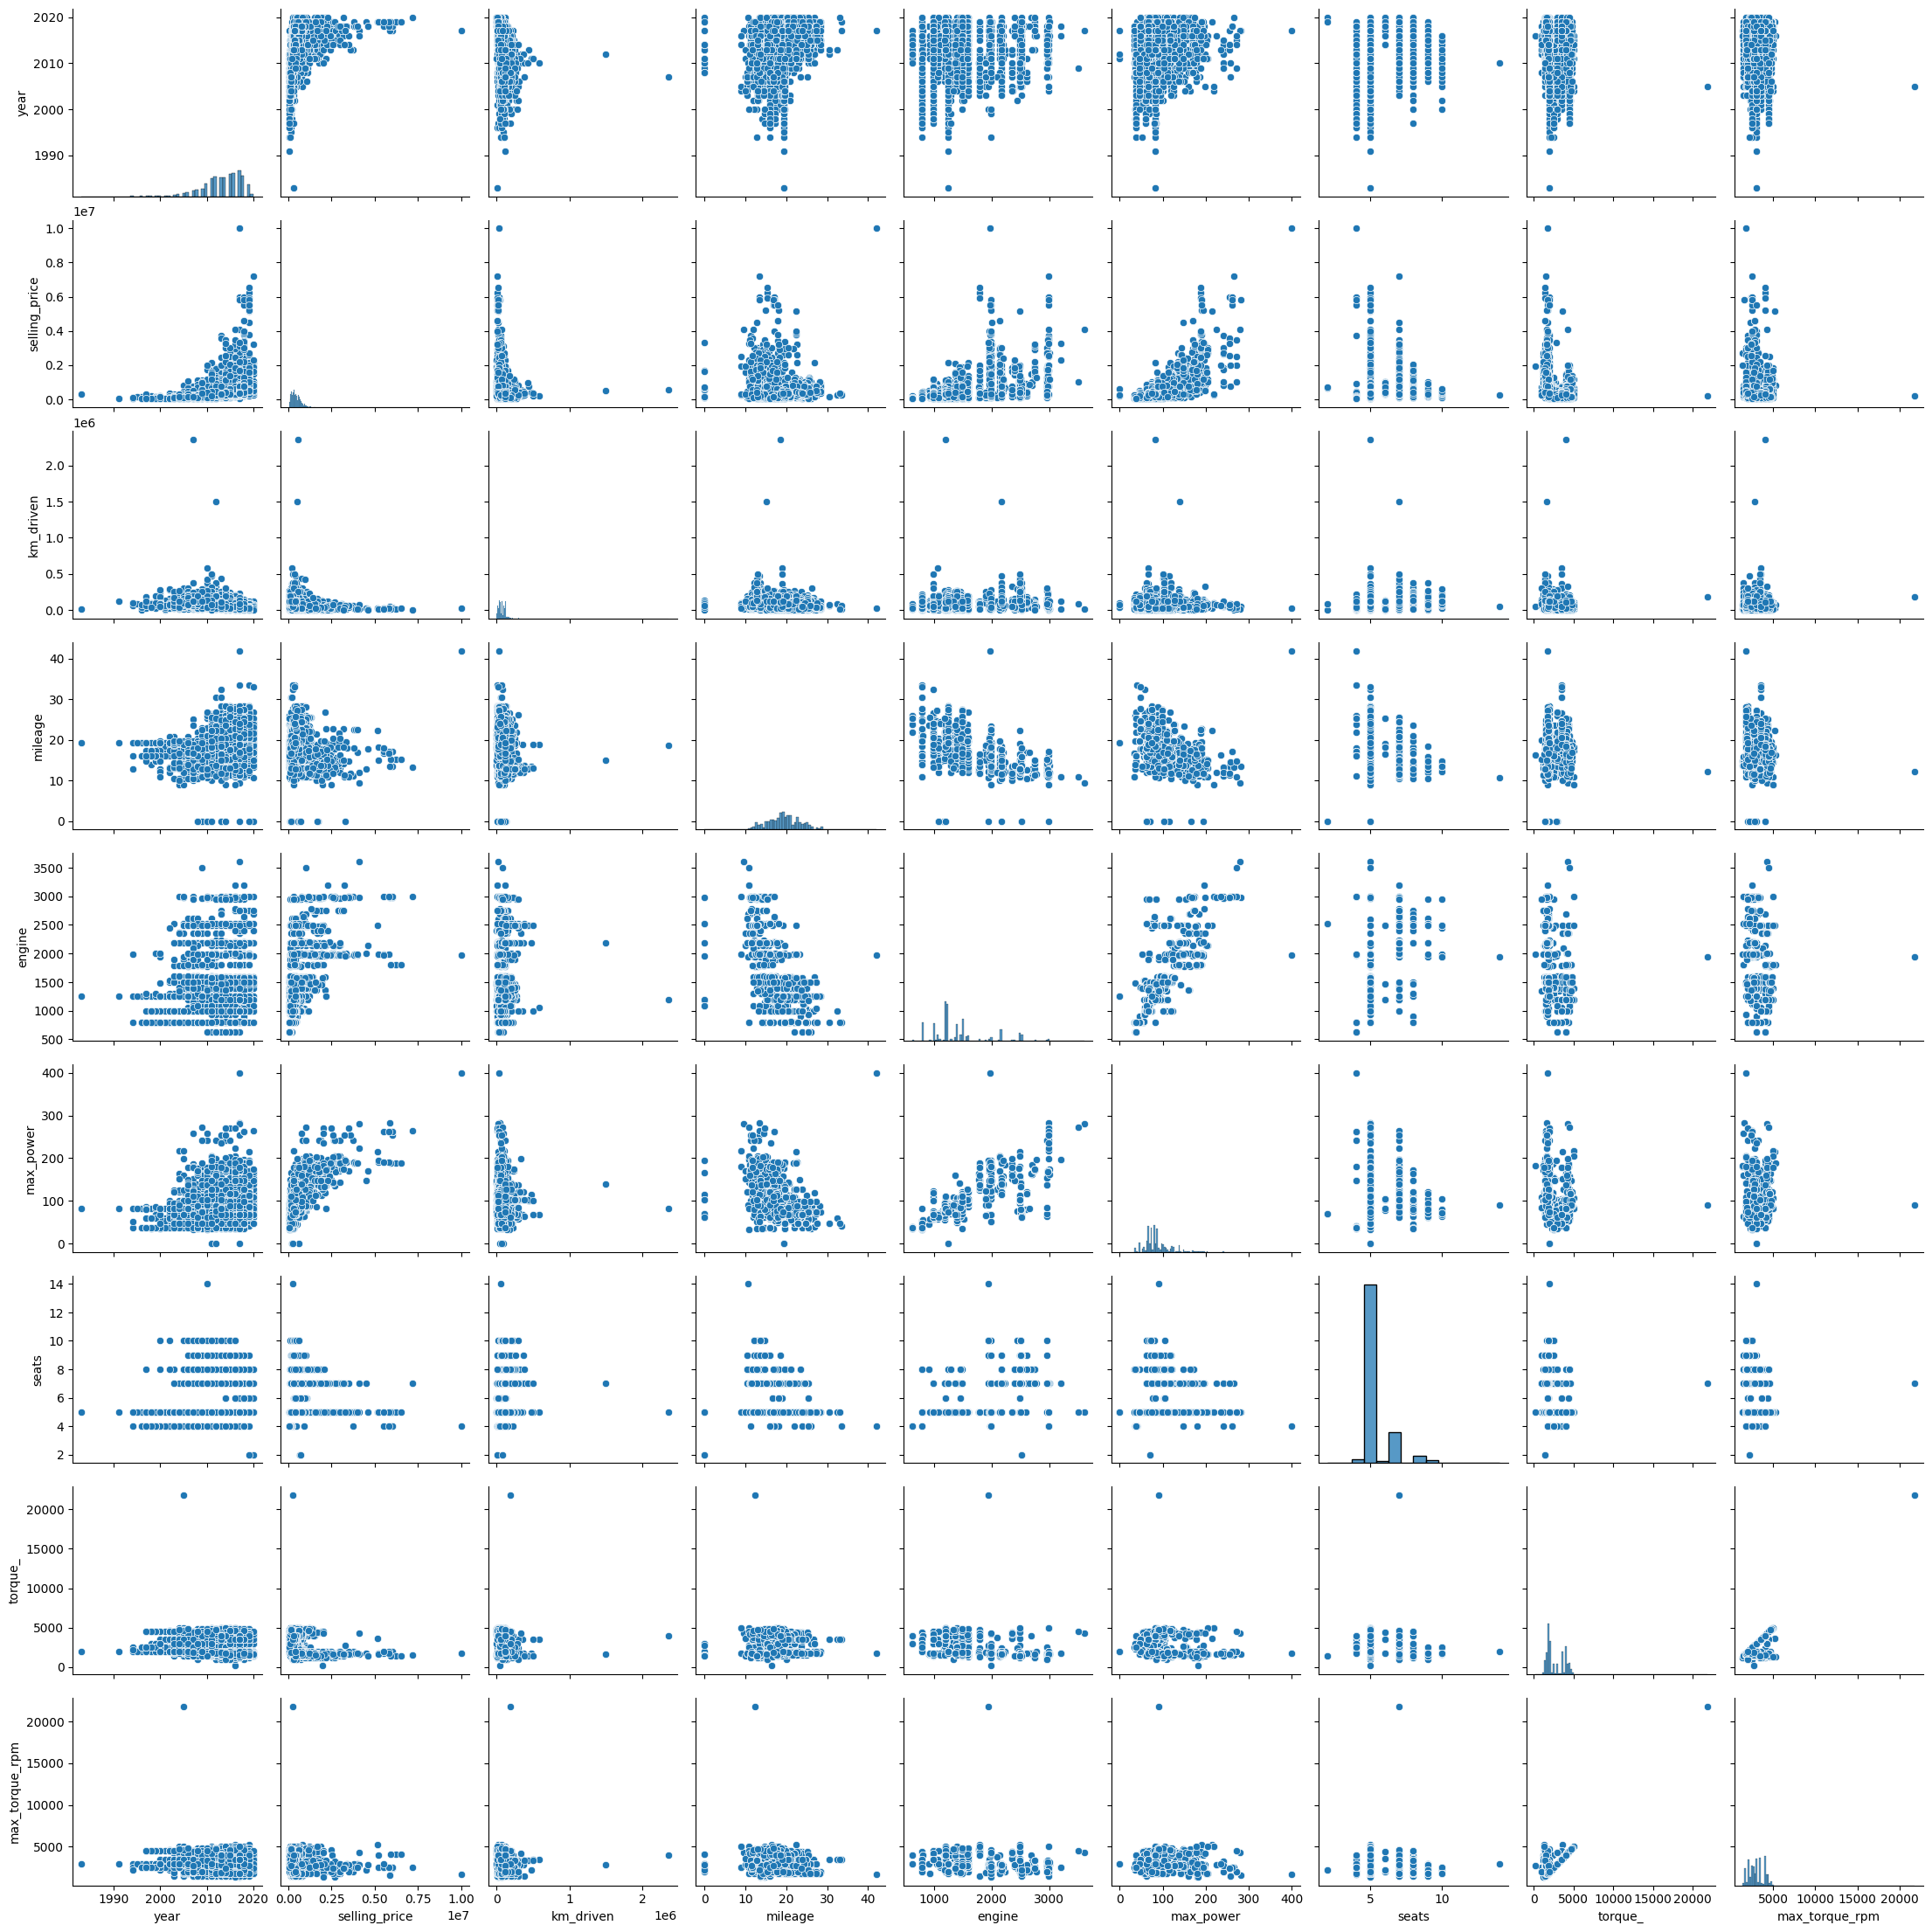

In [97]:
sns.pairplot(df_train)

In [98]:
# есть зависимость selling_price от engine max_power и year
# есть зависимость между engine и max_power, torque_ и max_torque_rpm

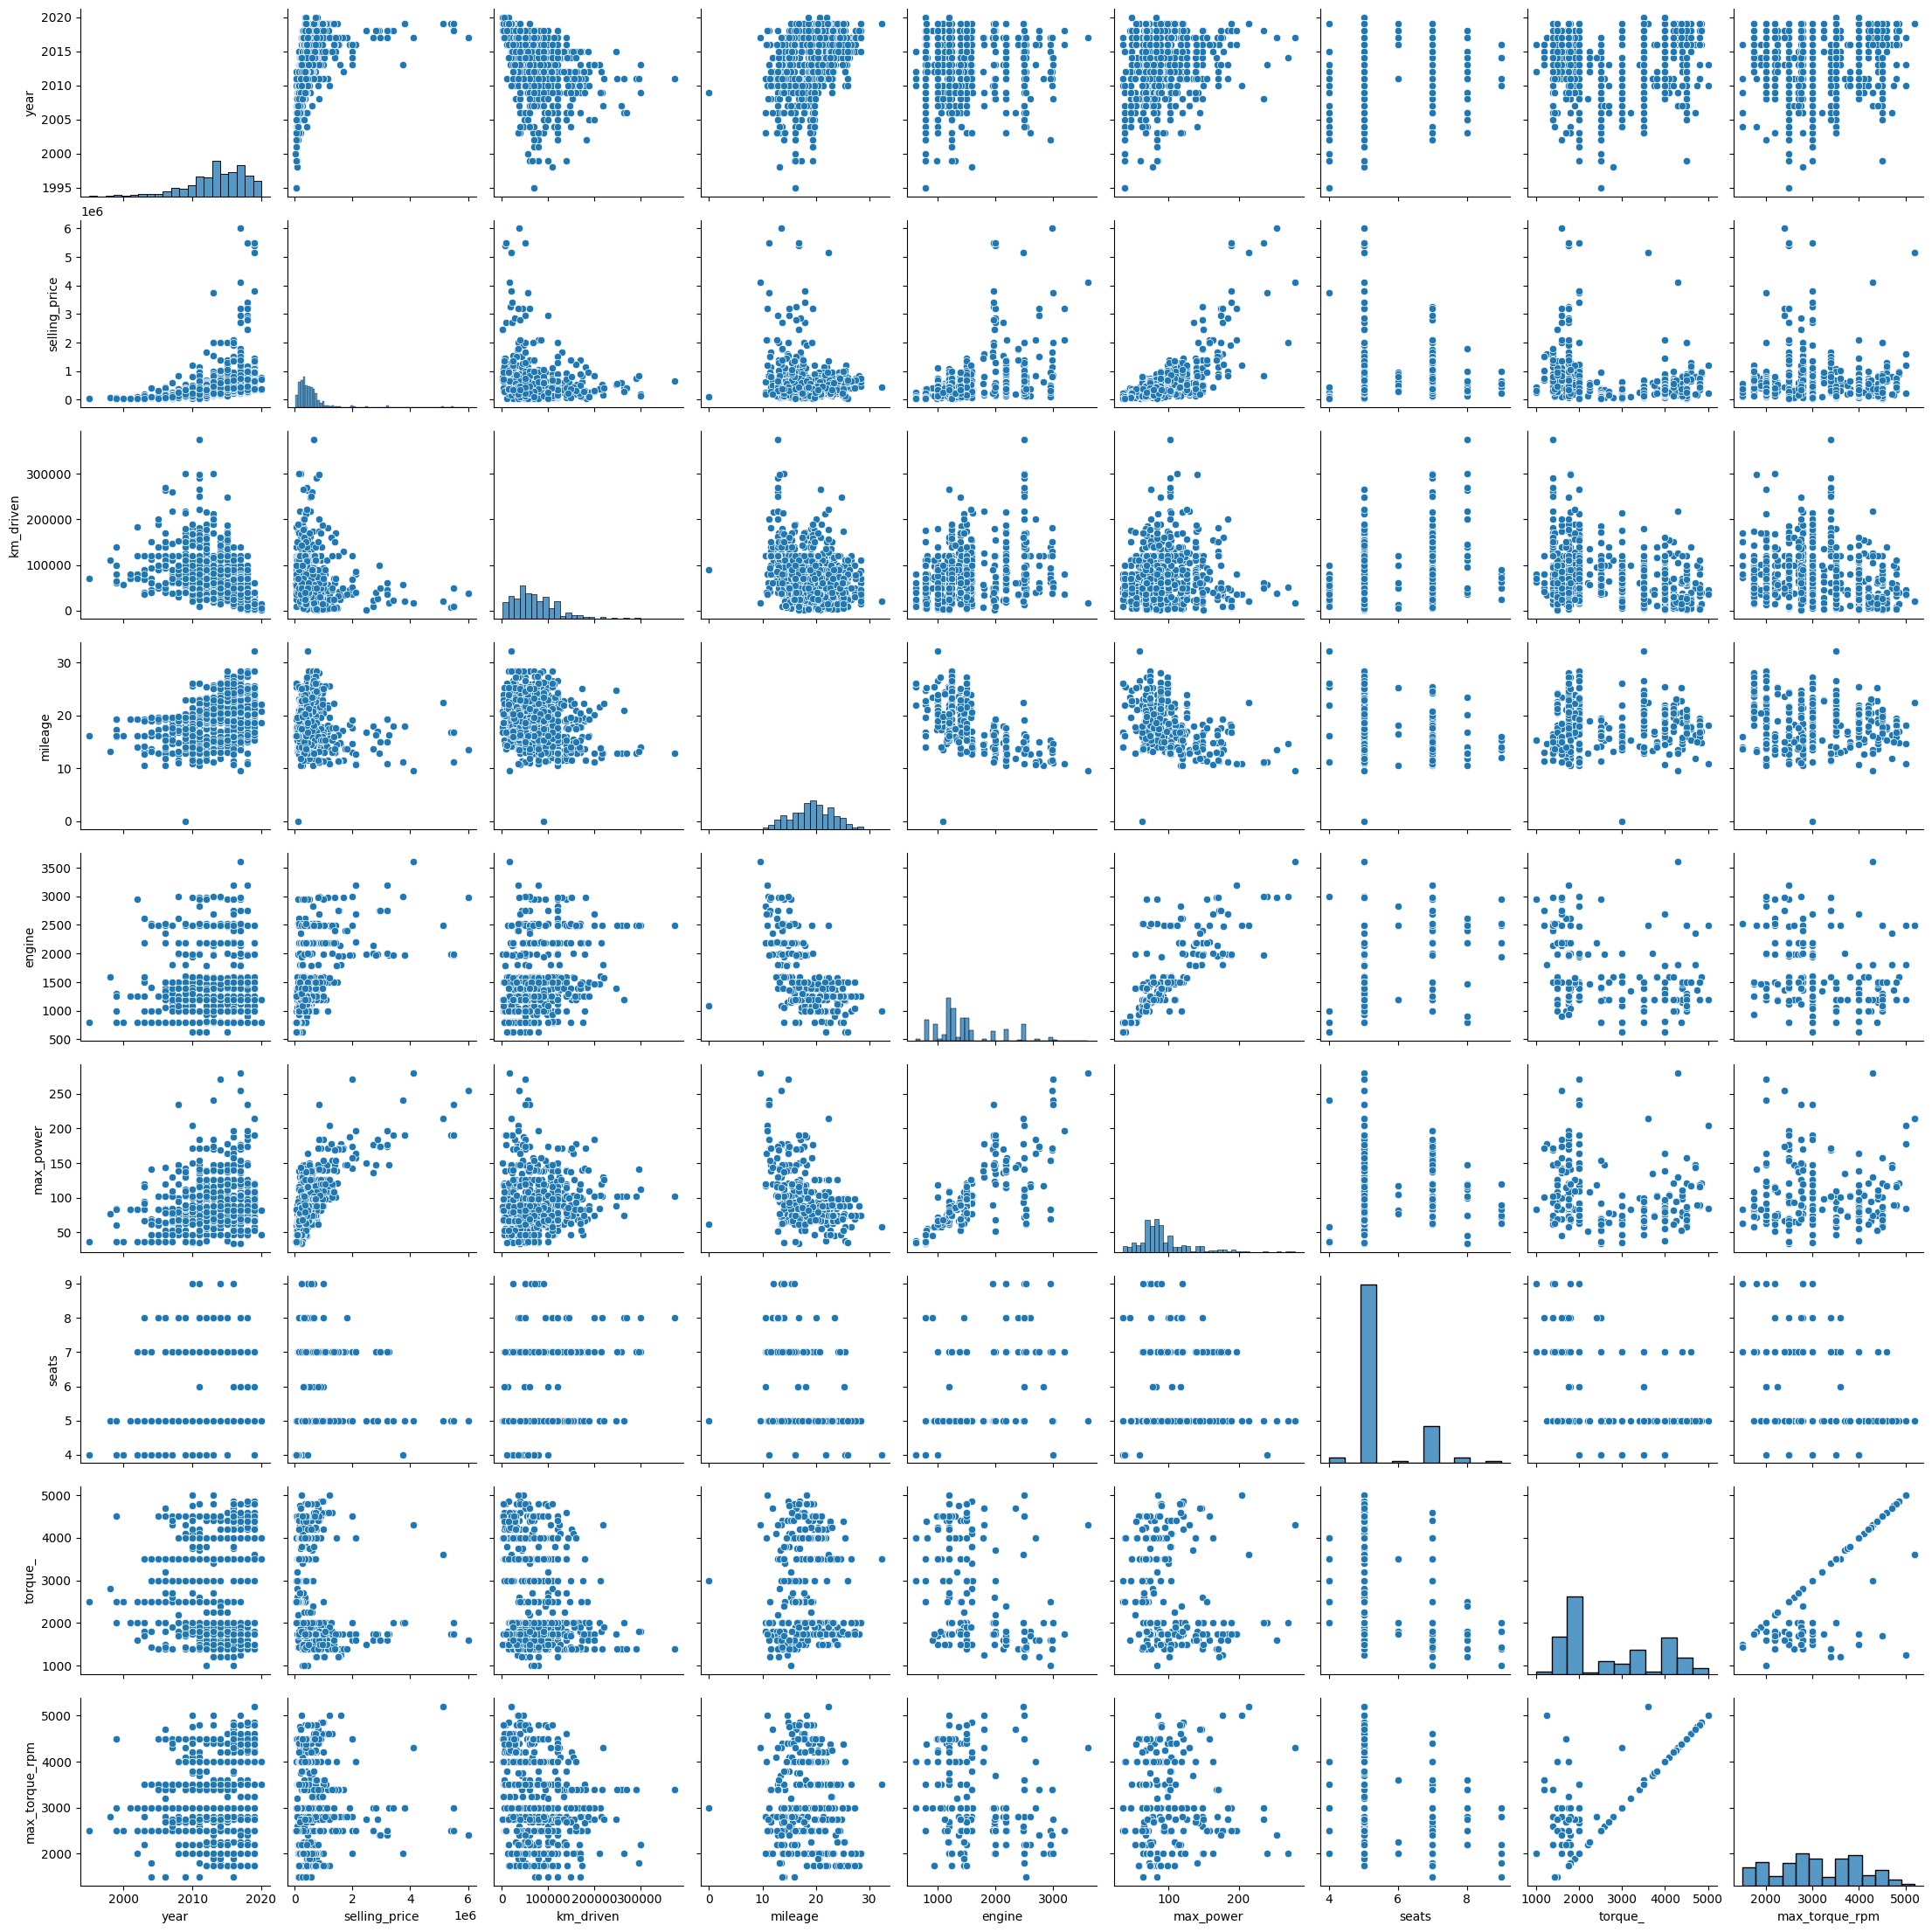

In [99]:
sns.pairplot(df_test)

In [100]:
# распределения данных похожи, но в train есть выбросы

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

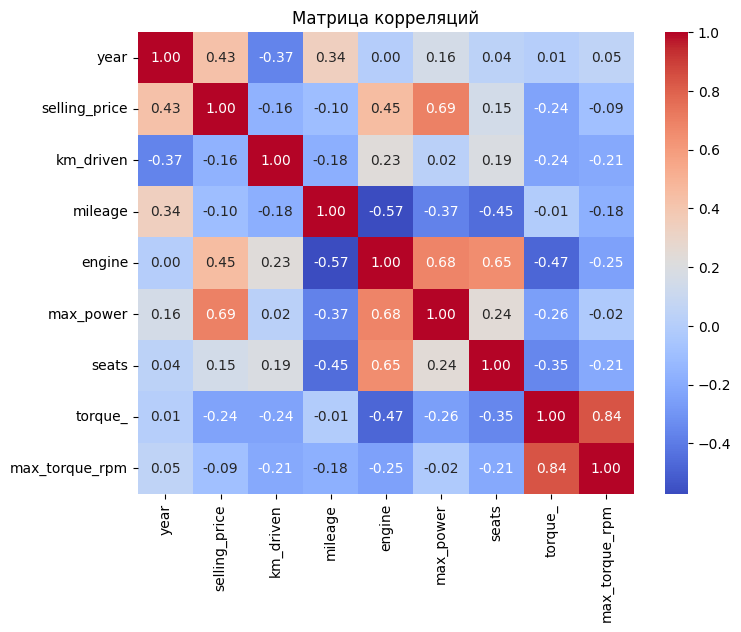

In [101]:
corr = df_train.loc[:, df_train.dtypes != "O"].corr()

plt.figure(figsize=(8, 6))  # задаем размер графика
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

In [ ]:
# year и engine никак не коррелируют
# между torque_ и max_torque_rpm сильная положительная линейная зависимость
# да, это можно утверждать

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [48]:
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40    1248   
1     Diesel  Individual       Manual          Second Owner    21.14    1498   
2     Diesel  Individual       Manual           First Owner    23.00    1396   
3     Petrol  Individual       Manual           First Owner    16.10    1298   
4     Petrol  Individual       Manual           First Owner    20.14    1197   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92    1086   
5836  Petrol  Individual       Manual          Second Owner    18.90     998   
5837  Petrol  Individual       Manual           First Owner    18.50    1197   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80    1493   
5839  Diesel  Individual       Manual           First Owner    19.30    1248   

      max_power  seats  torque_  max_torque_rpm  
0         74.00      5   2000.0          2000.0  
1        103.52      5   1500.0          2500.0  
2         90.00      5   1750.0          2750.0  
3         88.20      5   4500.0          4500.0  
4         81.86      5   4000.0          4000.0  
...         ...    ...      ...             ...  
5835      62.10      5   3000.0          3000.0  
5836      67.10      5   3500.0          3500.0  
5837      82.85      5   4000.0          4000.0  
5838     110.00      5   1900.0          2750.0  
5839      73.90      5   2000.0          2000.0  

[5840 rows x 14 columns]

In [56]:
def k_corr(coll_x, coll_y):
    n = coll_x.shape[0]
    R = 0
    for i in range(coll_x.shape[0]):
        R += ((coll_x[i] < coll_x[i:]) ^ (coll_y[i] < coll_y[i:])).sum()

    r = 1 - 4 * R / (n * (n - 1))
    return r

In [57]:
def get_matrix_rocc(df):
    m = np.zeros((df.shape[1], df.shape[1]))

    for coll_i in range(len(df.columns)):
        for coll_j in range(coll_i, len(df.columns)):
            m[coll_i][coll_j] = k_corr(df.loc[:, df.columns[coll_i]], df.loc[:, df.columns[coll_j]])
            m[coll_j][coll_i] = m[coll_i][coll_j]
            print(coll_i, "\t", coll_j, end="\r")
    
    return m

In [58]:
m = get_matrix_rocc(df_train)

<Axes: >

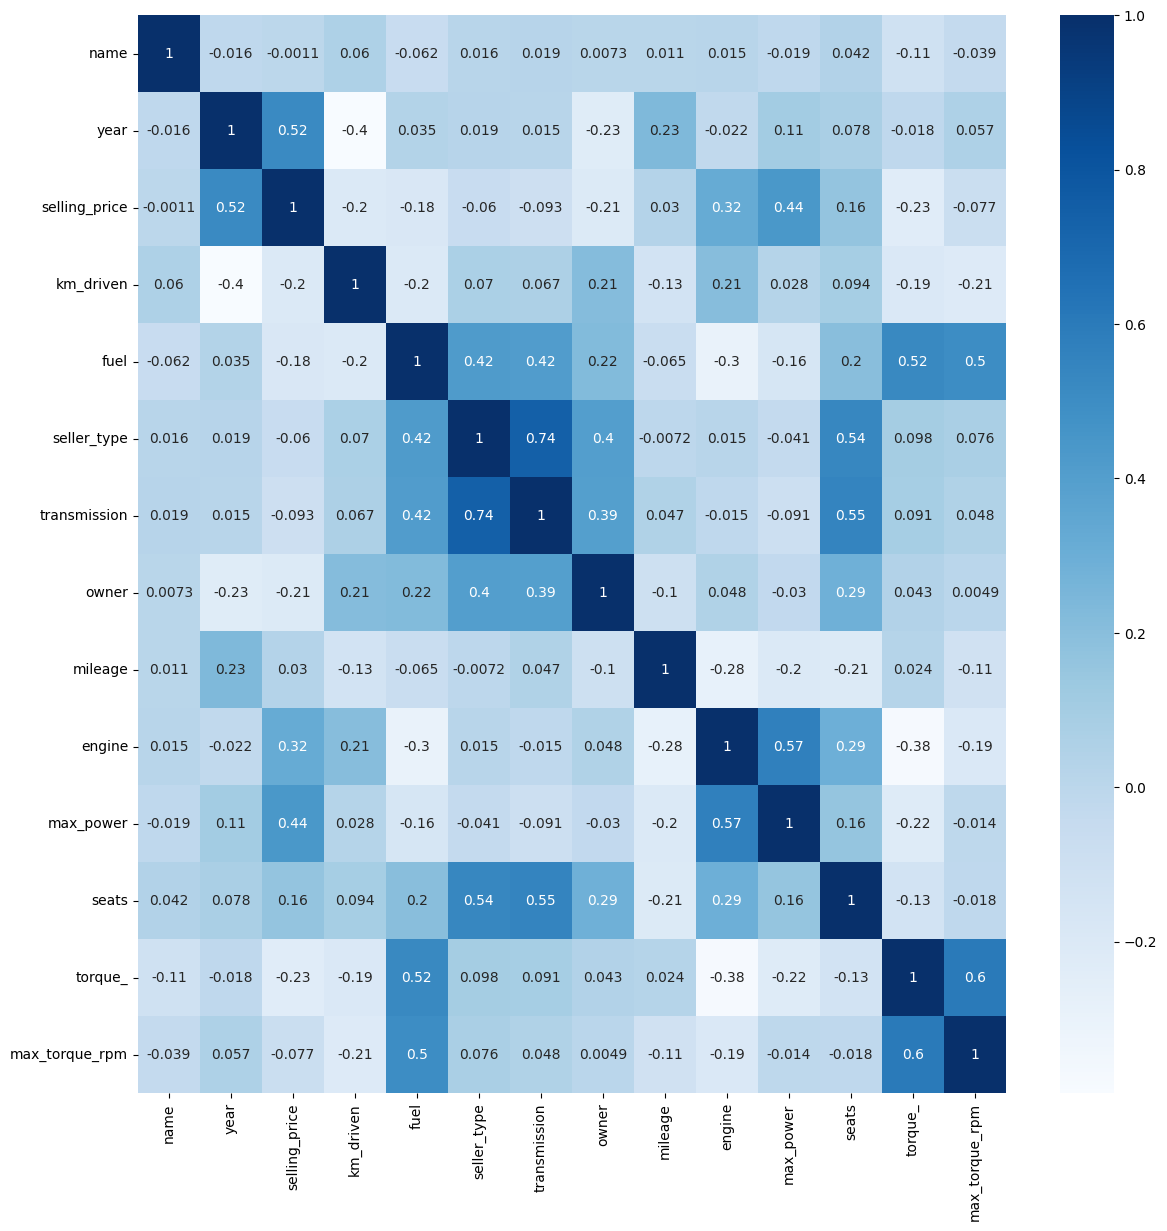

In [64]:
m_df = pd.DataFrame(m, columns=df_train.columns, index=df_train.columns)

plt.figure(figsize=(14,14))

sns.heatmap(m_df, cmap="Blues", annot=True)

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_', 'max_torque_rpm']


C:\Users\ochir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


<Axes: >

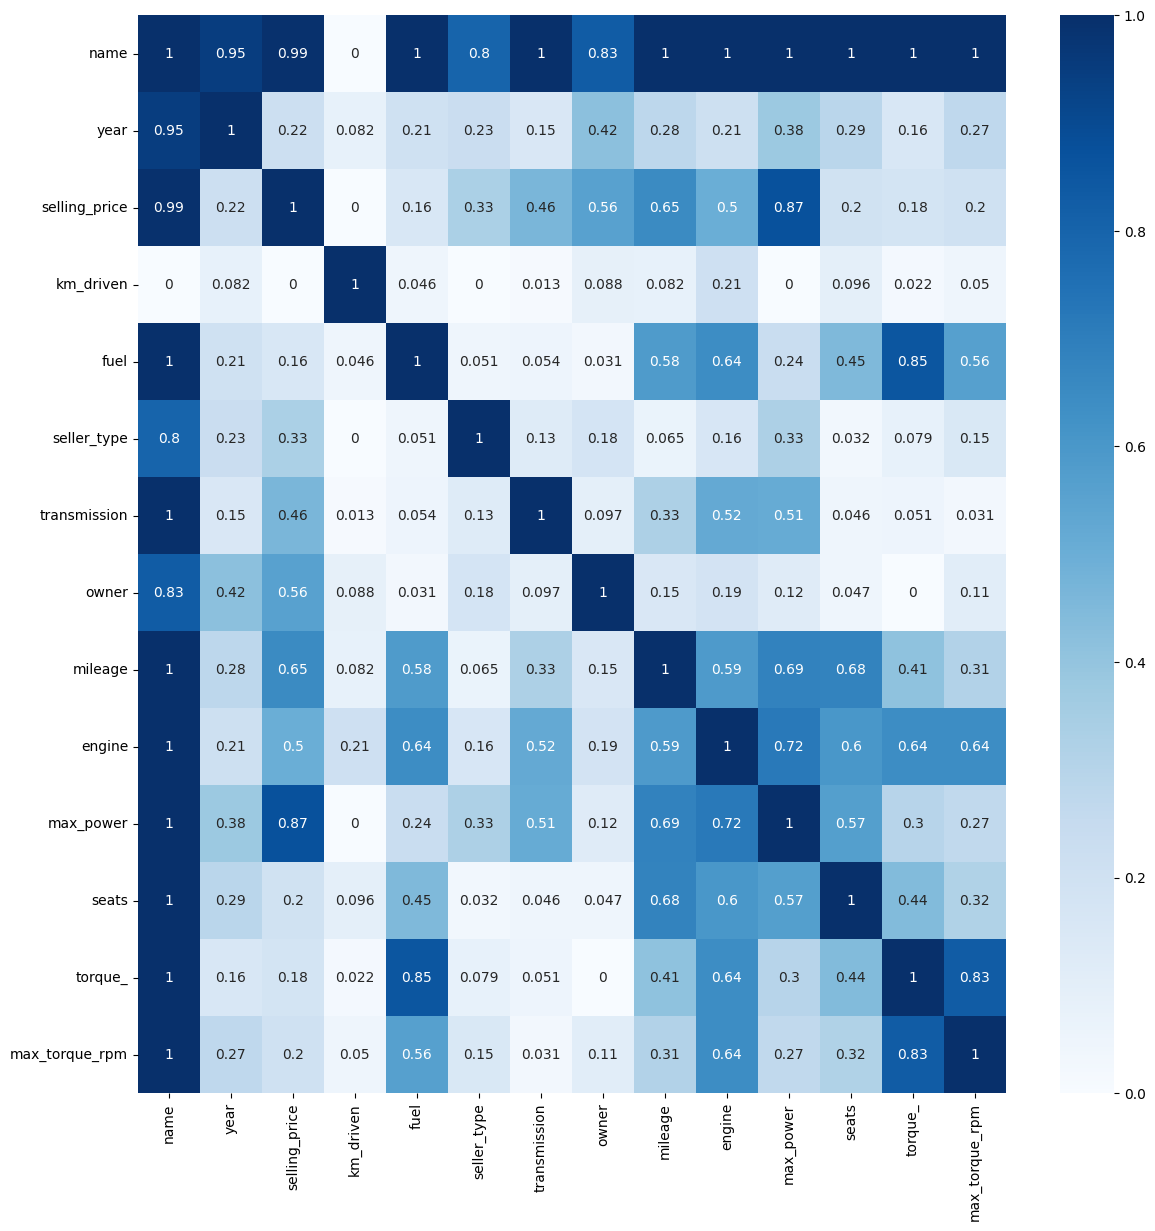

In [61]:
import phik

plt.figure(figsize=(14,14))

ph = df_train.phik_matrix()

sns.heatmap(ph, cmap="Blues", annot=True)

In [ ]:
# признаки mileage - max_torque_rmp попарно коррелируют между собой
# все признаки коррелируют с целевой переменной

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [ ]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [19]:
X_train = df_train.loc[:, df_train.dtypes != "object"].drop("selling_price", axis=1)
y_train = df_train["selling_price"]

In [20]:
assert X_train.shape == (5840, 8)

In [21]:
X_test = df_test.loc[:, df_test.dtypes != "object"].drop("selling_price", axis=1)
y_test = df_test["selling_price"]

In [22]:
assert X_test.shape == (1000, 8)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [24]:
print(r2_score(y_true=y_test, y_pred=model.predict(X_test)))
print(MSE(y_true=y_test, y_pred=model.predict(X_test)))

0.599662463977328
230125447599.76624


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [25]:
def r2_score_(y, y_pred):
    return 1 - sum((y - y_pred) ** 2) / sum((y - y.mean()) ** 2)

In [26]:
print(r2_score_(y=y_test, y_pred=model.predict(X_test)))

0.5996624639773275


In [30]:
# y - истинные значения
# y_pred - значения предсказанные моделью
# y.mean() - среднее значение истинных значений

`Your answer here`

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [27]:
def adjusted_r2(y, y_pred, k):
    return 1 - sum((y - y_pred) ** 2) * (y_test.shape[0] - 1) / (sum((y - y.mean()) ** 2) * (y_test.shape[0] - k))

In [28]:
print(adjusted_r2(y=y_test, y_pred=model.predict(X_test), k=X_test.shape[1]))

0.5968375015255545


In [33]:
# adjusted - R2 используется для сравнения моделей с разным кол-вом признаков.

`Your answer here`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

In [30]:
model.fit(X_train_scaler, y_train)

print(r2_score(y_true=y_test, y_pred=model.predict(X_test_scaler)))
print(MSE(y_true=y_test, y_pred=model.predict(X_test_scaler)))

0.572306383934962
245850503578.44913


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

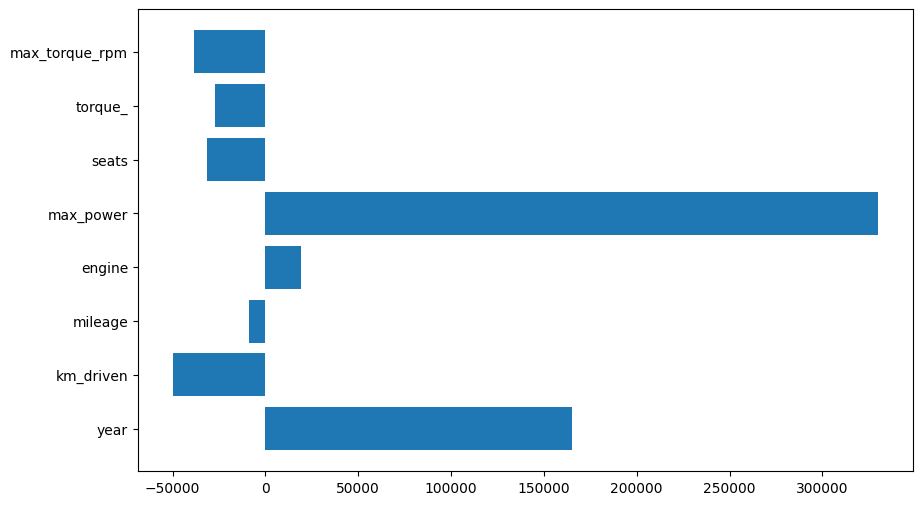

In [36]:
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, model.coef_)
plt.show()

In [66]:
# max_power - наиболее информативный признак

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [31]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train_scaler, y_train)

Lasso()

In [32]:
print(r2_score(y_true=y_test, y_pred=model_lasso.predict(X_test_scaler)))
print(MSE(y_true=y_test, y_pred=model_lasso.predict(X_test_scaler)))

0.5723049194908894
245851345382.72025


In [69]:
# ни один из коэффициентов не занулился т.к. все признаки имеют значисый вклад в построение модели

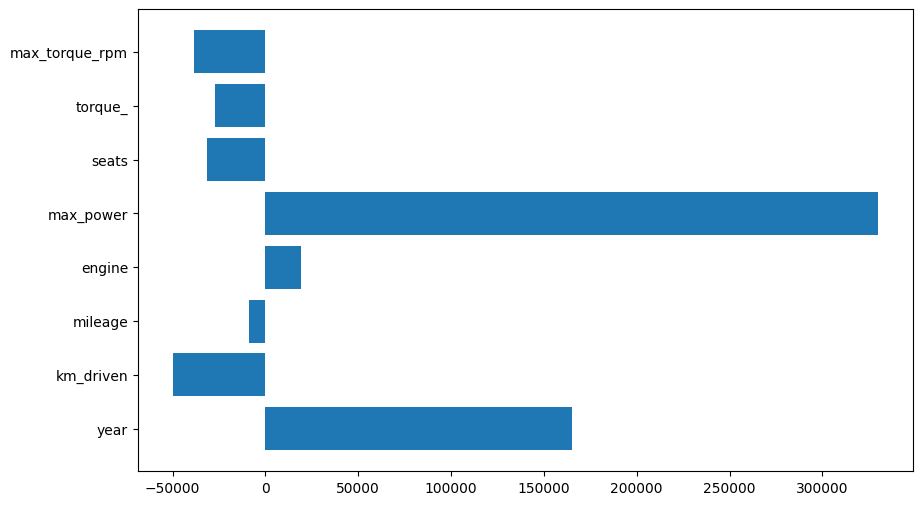

In [70]:
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, model_lasso.coef_)
plt.show()

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [36]:
from sklearn.model_selection import GridSearchCV

paparameters = {"alpha": np.logspace(-4, 2, 10), "selection": ("cyclic", "random"), 'tol': [1e-4, 1e-3, 1e-2]}
grig_search = GridSearchCV(estimator=Lasso(), param_grid=paparameters, cv=10, scoring="r2")
grig_search.fit(X_train_scaler, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]),
                         'selection': ('cyclic', 'random'),
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='r2')

In [37]:
grig_search.best_score_

0.5736864762424665

In [73]:
#  - Сколько грид-сёрчу пришлось обучать моделей?
#    aloha(10) * selection(2) * tol(3) = 60

In [74]:
#  - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
# alpha - коэффициент перед ||w||_1
#  tol  - минимальный прирост качества модели
#  selection - способ выбора коэффициентов во время процесса оптимизации

In [38]:
# - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

print(grig_search.best_params_)
print(grig_search.best_score_)

{'alpha': 100.0, 'selection': 'cyclic', 'tol': 0.001}
0.5736864762424665


In [39]:
best_model_lasso = grig_search.best_estimator_
best_model_lasso.coef_

array([164852.26969252, -49670.78982405,  -8504.9836849 ,  18804.43705589,
       329880.93770224, -30993.6654758 , -27301.99257505, -38280.54462248])

In [77]:
# коэффициенты не занулились

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
from sklearn.linear_model import ElasticNet

paparameters = {"alpha": np.logspace(-4, 2, 10), "l1_ratio": np.arange(0, 1, 0.1)}
grig_search_net = GridSearchCV(estimator=ElasticNet(), param_grid=paparameters, cv=10, scoring="r2")
grig_search_net.fit(X_train_scaler, y_train)

In [79]:
#  - Сколько грид-сёрчу пришлось обучать моделей?
#    aloha(10) * l1_ratio(10) = 100

In [42]:
# - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

print(grig_search_net.best_params_)
print(grig_search_net.best_score_)

{'alpha': 0.21544346900318823, 'l1_ratio': 0.30000000000000004}
0.5819776106593355


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [1]:
%pip install l0learn==0.4.3

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement l0learn==0.4.3 (from versions: none)
ERROR: No matching distribution found for l0learn==0.4.3


# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [43]:
df_train["name_frequency_encoding"] = df_train["name"].map(df_train["name"].value_counts() / df_train.shape[0])

In [44]:
X_train_cat = df_train.drop("selling_price", axis=1)

In [45]:
assert X_train_cat.shape == (5840, 14)

In [46]:
X_train_cat.describe(include='object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [47]:
X_train_cat["seats"] = X_train_cat["seats"].astype(object)

In [48]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

encoder = OneHotEncoder(handle_unknown="ignore")

one_hot = encoder.fit_transform(X_train_cat.drop("name", axis=1).loc[:, X_train_cat.dtypes == object])

In [49]:
X_train_cat_object = pd.DataFrame(one_hot.toarray(), columns=encoder.get_feature_names_out())

X_train_1 = pd.merge(X_train, X_train_cat_object, right_index=True, left_index=True)

X_train_1 = pd.merge(X_train_1, X_train_cat["name_frequency_encoding"], right_index=True, left_index=True)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

In [ ]:
# 1 - желательно предобрабатывать столбцы с большим количеством категорий. Нужно определить способ обработки новых категорий 

# 2 - если оставлять все столбцы, есть вероятность создать мультиколлинеарность.

# 3 - удаление не важных признаков повышает интерпретируемость модели, снижает время обучения и вычислительные мощьности. В случае если после удаления признаков метрики модели не ухудшились
#     их можно исключить.

`Your answer here`

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

paparameters = {"alpha": np.logspace(-6, 4, 10)}
grig_search_net = GridSearchCV(estimator=Ridge(), param_grid=paparameters, cv=10, scoring="r2")
grig_search_net.fit(X_train_1, y_train)

In [51]:
print(grig_search_net.best_score_)

print(grig_search_net.best_params_)

0.6270377532557936
{'alpha': 4.641588833612782}


In [ ]:
# качество улучшилось 

In [52]:
import pickle

In [53]:
with open('model.pkl', 'wb') as file:
    pickle.dump(grig_search_net.best_estimator_, file)

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

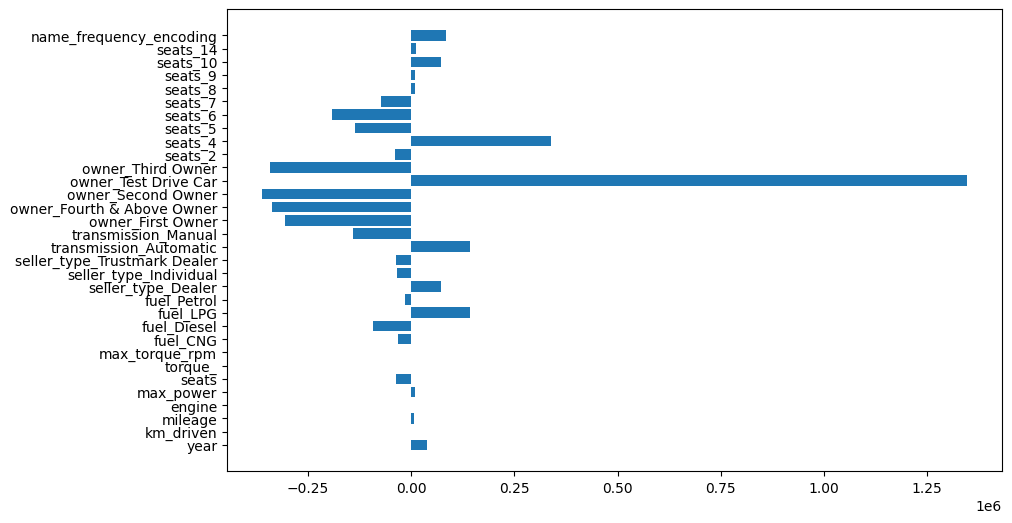

In [96]:
plt.figure(figsize=(10, 6))
plt.barh(X_train_1.columns, grig_search_net.best_estimator_.coef_)
plt.show()

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metrics(y_true, y_pred):
    # your code here

business_metrics(# your code here)

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [ ]:
def your_business_metrics(y_true, y_pred):

business_metrics(# your code here)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
import pandas as pd

df = pd.DataFrame()

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>